# Unbiased and Biased Distance Correlation (Dcorr)

In this tutorial, we explore

- The theory behind the Dcorr test statistic and p-value and it's equivalency with HSIC
- The features of the implementation
- A fast implementation of Dcorr

## Theory

### Formulation of test statistic and p-value

The following description is adapted from [[1]](https://arxiv.org/abs/1907.02088):

Dcorr can be used to measure linear and nonlinear associations between two random vectors of arbitrary dimension. Let ${\mathbf{D}}^{\mathbf{x}}$ be the $n \times n$ distance matrix of $\mathbf{x}$ and ${\mathbf{D}}^{\mathbf{y}}$ be the $n \times n$ distance matrix of $\mathbf{y}$. The distance covariance (Dcov) is defined as

$$\mathrm{Dcov}_n (\mathbf{x}, \mathbf{y}) = \frac{1}{n^2} \mathrm(tr) \left( {{\mathbf{D}}^{\mathbf{x}} \mathbf{H} {\mathbf{D}}^{\mathbf{y}} \mathbf{H}} \right).$$

The normalized version of this covariance is Dcorr [[2]](https://projecteuclid.org/euclid.aos/1201012979) and can be calculated as

$$\mathrm{Dcorr}_n (\mathbf{x}, \mathbf{y}) = \frac{\mathrm{Dcov}_n (\mathbf{x}, \mathbf{y})}{\sqrt{\mathrm{Dcov}_n ( \mathbf{x}, \mathbf{x}) \mathrm{Dcov}_n (\mathbf{y}, \mathbf{y})}}.$$

The original Dcorr is biased. A modified matrix ${\mathbf{C}}^{\mathbf{x}}$ based on $\mathbf{H} {\mathbf{D}}^{\mathbf{x}} \mathbf{H}$ can be calculated as

$${\mathbf{C}_{ij}}^{\mathbf{x}} =
\begin{cases}
{\mathbf{D}_{ij}}^{\mathbf{x}} - \frac{1}{n - 2} \sum_{t = 1}^n {\mathbf{D}_{it}}^{\mathbf{x}} - \frac{1}{n - 2} \sum_{s = 1}^n {\mathbf{D}_{sj}}^{\mathbf{x}} + \frac{1}{\left( n - 1 \right) (n - 2)} \sum_{s, t = 1}^n {\mathbf{D}_{st}}^{\mathbf{x}}& i \neq j \\
0 & \mathrm{otherwise}
\end{cases},$$

and similarly for ${\mathbf{C}}^{\mathbf{y}}$. Then
the unbiased Dcov (UDcorr) [[3]](https://projecteuclid.org/euclid.aos/1413810731) is thus

$$ \mathrm{UDcov}_n (\mathbf{x}, \mathbf{y}) = \frac{1}{n (n - 3)} \mathrm{tr} ({{\mathbf{C}}^{\mathbf{x}} {\mathbf{C}}^{\mathbf{y}}}).$$

UDcorr can consequently be calculated using the same equation as the one used to Dcorr.

### Equivalency of Dcorr and HSIC

The following description is adapted from [[1]](https://arxiv.org/abs/1907.02088):

Hsic is a way to measure multivariate nonlinear associations given a specified kernel [[4]](https://arxiv.org/abs/0805.2368). Let ${\mathbf{K}}^{\mathbf{x}}$ be an $n \times n$ kernel matrix of $\mathbf{x}$ and ${\mathbf{K}}^{\mathbf{y}}$ be an $n \times n$ kernel matrix of $\mathbf{y}$. In addition, $\mathbf{H} = \mathbf{I} - (1 / n) \mathbf{J}$ and is an $n \times n$ centering matrix, where $\mathbf{I}$ is the identify matrix of size $n \times n$ and $\mathbf{J}$ is a matrix of ones that is the same size. Then, Hsic is defined as

$$\mathrm{Hsic}_n (\mathbf{x}, \mathbf{y}) = \frac{1}{n^2} \mathrm{tr} ({{\mathbf{K}}^{\mathbf{x}} \mathbf{H} {\mathbf{K}}^{\mathbf{y}} \mathbf{H}}).$$

The default kernel choice is the Gaussian kernel using the median distance as the bandwidth, which is a characteristic kernel that guarantees Hsic being a consistent test [[4](https://arxiv.org/abs/0805.2368), [5](http://www.jmlr.org/papers/v11/gretton10a.html)]. Specifically, the Gaussian kernel transformation for $\mathbf{x}$  of the form $\mathcal{N} (0, \mathrm{med}{ ( x_i - x_j) })$ where $\mathrm{med}$ refers to the dimension-wise median of $\mathbf{x}$. The transformation for $\mathbf{y}$ is defined similarly.

Hsic and Dcorr are indeed equivalent in the sense that every valid kernel has a corresponding valid semimetric to ensure their equivalence, and vice versa [[6](https://projecteuclid.org/euclid.aos/1383661264), [7](https://arxiv.org/abs/1806.05514)].

## Using Dcorr

Before delving straight into function calls, let's first import some useful functions, to ensure consistency in these examples, we set the seed:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
import matplotlib.ticker as ticker
import seaborn as sns; sns.set(style="white")

from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks import simulations as sims

np.random.seed(12345678)

To start, let's simulate some linear data:

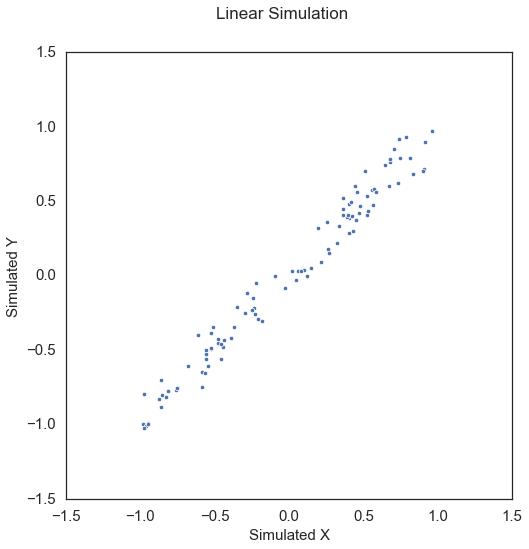

In [2]:
x, y = sims.linear_sim(num_samp=100, num_dim=1, noise=0.1)

fig = plt.figure(figsize=(8,8))
fig.suptitle("Linear Simulation", fontsize=17)
ax = sns.scatterplot(x=x[:,0], y=y[:,0])
ax.set_xlabel('Simulated X', fontsize=15)
ax.set_ylabel('Simulated Y', fontsize=15) 
plt.axis('equal')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The test statistic and p-value can be called by creating the `DCorr` object and simply calling the corresponding test statistic and p-value methods. The value of `which_test` can be modified to 3 different values: `biased` for biased Dcorr, `unbiased` for unbiased Dcorr, and `mantel` for Mantel.

In [3]:
dcorr = DCorr(which_test='biased')
dcorr_statistic, independence_test_metadata = dcorr.test_statistic(x, y)
p_value, _ = dcorr.p_value(x, y)

print("Dcorr test statistic:", dcorr_statistic)
print("P Value:", p_value)

Dcorr test statistic: 0.9724847196117954
P Value: 0.001


Due to the similarities between Dcorr and MGC, many of the properties of the values of the test statistics are similar (value of 1 for linear, etc.). The p-value is bounded by the number of repetitions (in this case 1000). This is because since we are estimating the null distribution via permutation, this is the lowest value that we can be sufficiently sure is the p-value. It is worth noting that as in most of the other tests that use permutation to approximate the p-value, the `replication_factor` parameter can be set to the desired number.

Unlike in the case of MGC, Dcorr struggles to consistently identify some nonlinear relationships.

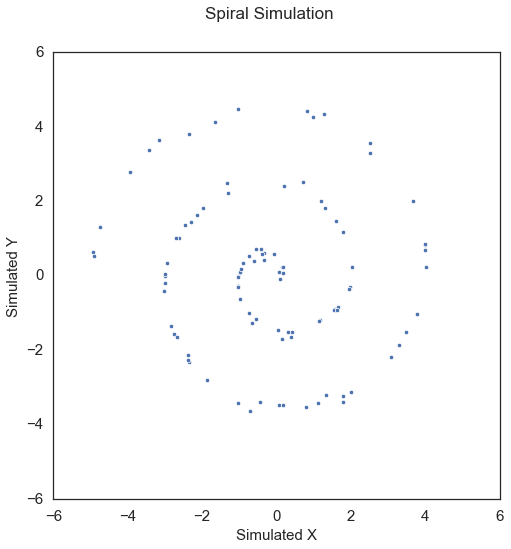

In [4]:
x, y = sims.spiral_sim(num_samp=100, num_dim=1, noise=0.1)

fig = plt.figure(figsize=(8,8))
fig.suptitle("Spiral Simulation", fontsize=17)
ax = sns.scatterplot(x=x[:,0], y=y[:,0])
ax.set_xlabel('Simulated X', fontsize=15)
ax.set_ylabel('Simulated Y', fontsize=15) 
plt.axis('equal')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Applying Dcorr on this data,

In [5]:
dcorr = DCorr(which_test='unbiased')
dcorr_statistic, independence_test_metadata = dcorr.test_statistic(x, y)
p_value, _ = dcorr.p_value(x, y)

print("Dcorr test statistic:", dcorr_statistic)
print("P Value:", p_value)

Dcorr test statistic: 0.012101670566301154
P Value: 0.19970250056635008


Here, Dcorr has a p-value greater than the alpha value of 0.05, which is not desirable.

## A faster version of Dcorr (Fast Dcorr)

Dcorr operates in $\mathcal{O} (n^2)$ time. To make things faster, Fast Dcorr can be used. This version of Dcorr takes bootstrapped subsamples of the input data matrices and estimates the null distribution using the subsamples. Fast Dcorr, thus, operates in $\mathcal{O} (n)$ time.

Calling Fast Dcorr is similar to calling Dcorr except that the `is_fast` flag should be set to `True` in either the `test_statistic` or `p_value` methods. The number of subsamples used can either be defined or can be chosen optimally from the provided data. Using the some linear data as before,

In [6]:
x, y = sims.linear_sim(100000, 1)

b_dcorr = DCorr(which_test="biased")
u_dcorr = DCorr(which_test="unbiased")

b_p_value, _ = b_dcorr.p_value(x, y, is_fast=True)
u_p_value, _ = u_dcorr.p_value(x, y, is_fast=True)

print("Biased P Value:", b_p_value)
print("Unbiased P Value:", u_p_value)

Biased P Value: 0.001
Unbiased P Value: 0.001


This is able to calculate many more samples in a time faster than Dcorr!

# Mantel

In this tutorial, we explore

- The theory behind the Mantel test statistic and p-value
- The features of the implementation

## Theory

Mantel is one of the earliest distance-based statistic for independence [[8]](https://cancerres.aacrjournals.org/content/27/2_Part_1/209), which achieves some success in testing without consistency testing (Mantel is later shown to be not consistent, see [[4]](https://projecteuclid.org/euclid.aop/1378991840)). Given $\mathbf{x}$ and $\mathbf{y}$, suppose that an appropriate distance measure is used to calculate two  $n \times n$ distance matrices ${\mathbf{D}}^{\mathbf{x}}$ and ${\mathbf{D}}^{\mathbf{y}}$ respectively, e.g., Euclidean distance. Let the centered matrix be calculated as,

$$ {\mathbf{C}_{ij}}^{\mathbf{x}} = {\mathbf{D}_{ij}}^{\mathbf{x}} - \frac{1}{n (n - 1)} \sum_{i, j = 1}^n {\mathbf{D}_{ij}}^{\mathbf{x}},$$

similarly for ${\mathbf{C}}^{\mathbf{y}}$. Consider a function of $\mathbf{x}$ and $\mathbf{y}$, $M$, such that,

$$M_n (\mathbf{x}, \mathbf{y}) = \mathrm{trace}({{\mathbf{C}}^{\mathbf{x}} {\mathbf{C}}^{\mathbf{y}}}).$$

Then, the Mantel coefficient is calculated as,

$$ \mathrm{Mantel}_n (\mathbf{x}, \mathbf{y}) = \frac{M_n (\mathbf{x}, \mathbf{y})}{\sqrt{M_n (\mathbf{x}, \mathbf{x}) M_n (\mathbf{y}, \mathbf{y})}}.$$

## Using Mantel

To start, let's simulate some linear data:

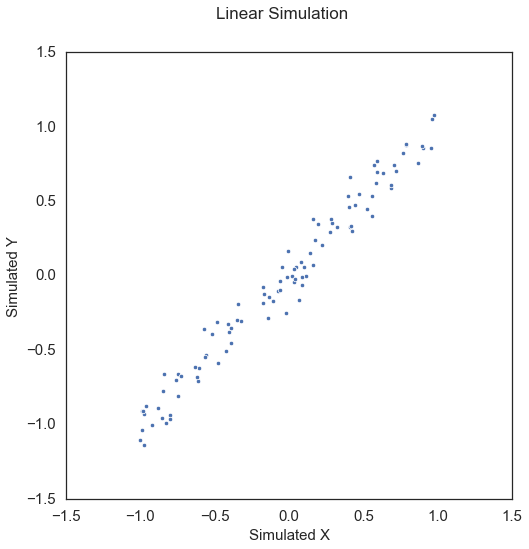

In [7]:
x, y = sims.linear_sim(num_samp=100, num_dim=1, noise=0.1)

fig = plt.figure(figsize=(8,8))
fig.suptitle("Linear Simulation", fontsize=17)
ax = sns.scatterplot(x=x[:,0], y=y[:,0])
ax.set_xlabel('Simulated X', fontsize=15)
ax.set_ylabel('Simulated Y', fontsize=15) 
plt.axis('equal')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The test statistic and p-value can be called by creating the `DCorr` object and simply calling the corresponding test statistic and p-value methods. The value of `which_test` can be modified to 3 different values: `biased` for biased Dcorr, `unbiased` for unbiased Dcorr, and `mantel` for Mantel.

In [8]:
dcorr = DCorr(which_test='mantel')
dcorr_statistic, independence_test_metadata = dcorr.test_statistic(x, y)
p_value, _ = dcorr.p_value(x, y)

print("Dcorr test statistic:", dcorr_statistic)
print("P Value:", p_value)

Dcorr test statistic: 0.9591913132744958
P Value: 0.001


The p-value is bounded by the number of repetitions (in this case 1000). This is because since we are estimating the null distribution via permutation, this is the lowest value that we can be sufficiently sure is the p-value. It is worth noting that as in most of the other tests that use permutation to approximate the p-value, the `replication_factor` parameter can be set to the desired number.